# Выбор локации для скважины

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap

## Загрузка и подготовка данных

In [1]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df_1 = pd.read_csv('geo_data_0.csv')
df_2 = pd.read_csv('geo_data_1.csv')
df_3 = pd.read_csv('geo_data_2.csv')

In [3]:
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_1.duplicated().sum()

0

In [6]:
df_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_2.duplicated().sum()

0

In [10]:
df_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df_3.duplicated().sum()

0

In [14]:
df_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Данные чистые. Можно приступить к анализу

## Исследовательский анализ данных

In [15]:
# Функция для вывода частот признаков отдельного региона

def f_hist(df, region_name):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

    ax1.hist(df['f0'], label='f 0');
    ax1.grid()
    ax1.legend()

    ax2.hist(df['f1'], label='f 1');
    ax2.grid()
    ax2.legend()
    ax2.set_title(region_name)

    ax3.hist(df['f2'], label='f 2');
    ax3.grid()
    ax3.legend()

    plt.show()

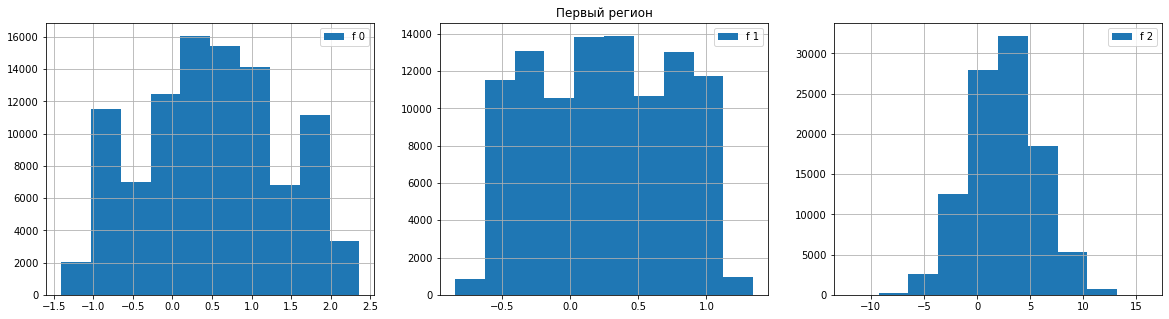

In [16]:
f_hist(df_1, 'Первый регион')

Размах значений сильно отличается по признакам. После разбиения выборки нужно провести стандартизацию масштабов

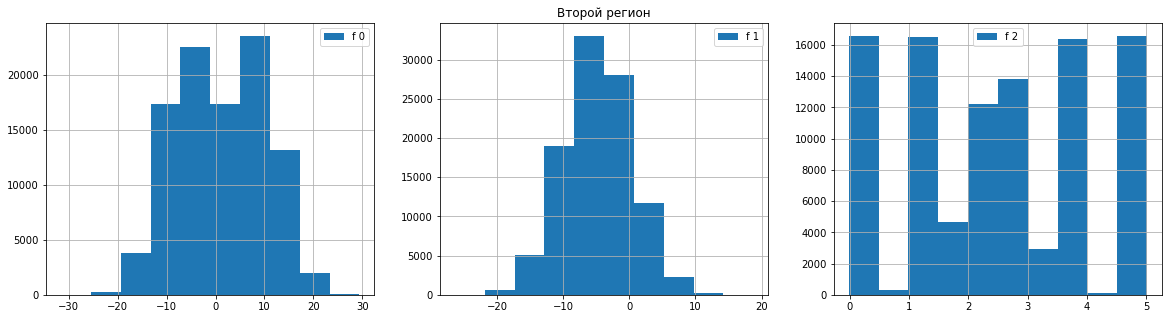

In [17]:
f_hist(df_2, 'Второй регион')

Здесь тоже размах значений отличается. Интересное распределение получилось у признака f2 - в нескольких отдельных значениях частота очень высокая, в остальных - сильно низкая

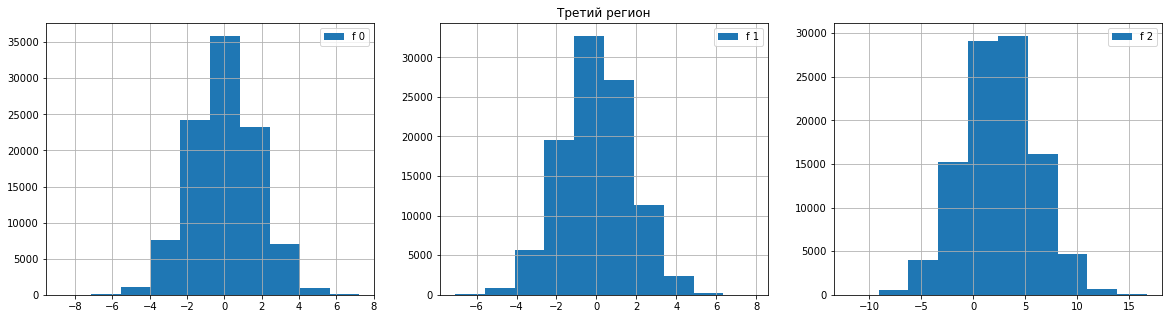

In [18]:
f_hist(df_3, 'Третий регион')

Здесь размах значений не сильно отличается. Распределения все симметричные

Построим график распределения частот целевого признака по каждому региону

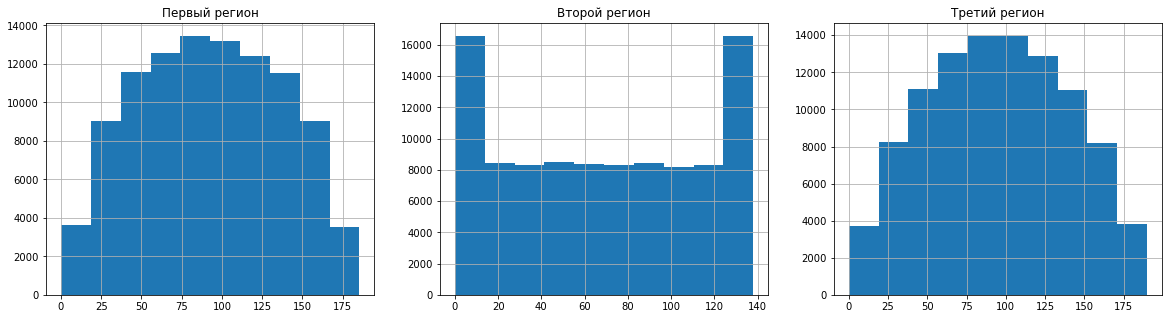

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax1.hist(df_1['product']);
ax1.set_title('Первый регион')
ax1.grid()

ax2.hist(df_2['product']);
ax2.set_title('Второй регион')
ax2.grid()

ax3.hist(df_3['product']);
ax3.set_title('Третий регион')
ax3.grid()

plt.show()

Графики первого и третьего региона очень похожи.  
Напротив, график второго региона не обычный. Большинство значений частот примерно равны 8000, значений с 0 до 10 больше 16000, столько же значений с 125 до 140

Посмотрим на график корреляции между признаками

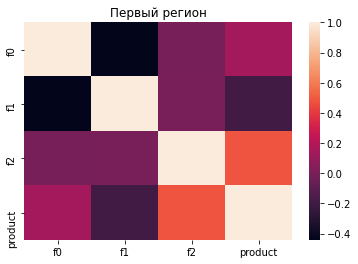

In [20]:
sns.heatmap(df_1.corr()).set_title('Первый регион');

Средняя корреляция между признаком f2 и целевым признаком

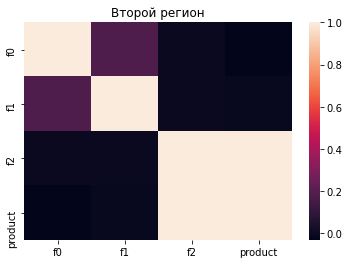

In [21]:
sns.heatmap(df_2.corr()).set_title('Второй регион');

Во втором регионе идеальная корреляция между признаком f2 и целевым признаком. Можно предсказать объем сырья основываясь на этом признаке

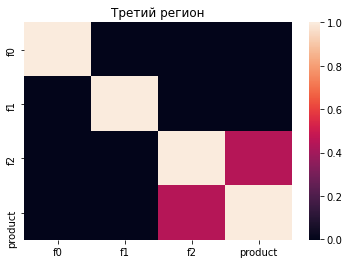

In [22]:
sns.heatmap(df_3.corr()).set_title('Третий регион');

В третьем регионе тоже средняя корреляция между признаком f2 и целевым признаком

## Обучение и проверка модели

In [23]:
model = LinearRegression()

In [24]:
scaler = StandardScaler()

In [25]:
# Функция для разбиения на обучающую и валидационную выборки

def train_test_split_function(df):
    X = df.drop(['id', 'product'], axis=1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=22)
    return X, y, X_train, X_valid, y_train, y_valid

In [26]:
# Функция для расчета rmse

def rmse_calculation(X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred) ** 0.5
    return model, y_pred, rmse

In [27]:
# Функция для стандартизации масштабов признаков

def scaling(X_train, X_valid):
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
    return X_train_scaled, X_valid_scaled

In [28]:
X_1, y_1, X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split_function(df_1)

In [29]:
X_1_train.shape, X_1_valid.shape, y_1_train.shape, y_1_valid.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [30]:
X_1_train, X_1_valid = scaling(X_1_train, X_1_valid)

In [31]:
model_1, y_1_pred, rmse_1 = rmse_calculation(X_1_train, y_1_train, X_1_valid, y_1_valid)

In [32]:
y_1_pred.mean()

92.53987606504546

In [33]:
rmse_1

37.411414310487665

Средний запас предсказанного сырья в первом регионе составил 92.5 . И в среднем наша модель ошибается на 37.4

In [34]:
X_2, y_2, X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split_function(df_2)

In [35]:
X_2_train.shape, X_2_valid.shape, y_2_train.shape, y_2_valid.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [36]:
X_2_train, X_2_valid = scaling(X_2_train, X_2_valid)

In [37]:
model_2, y_2_pred, rmse_2 = rmse_calculation(X_2_train, y_2_train, X_2_valid, y_2_valid)

In [38]:
y_2_pred.mean()

68.72413030510705

In [39]:
rmse_2

0.8916430396076002

Во втором регионе средний запас предсказанного сырья меньше - 68.7. Но зато ошибаемся меньше)

In [40]:
X_3, y_3, X_3_train, X_3_valid, y_3_train, y_3_valid = train_test_split_function(df_3)

In [41]:
X_3_train.shape, X_3_valid.shape, y_3_train.shape, y_3_valid.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [42]:
model_3, y_3_pred, rmse_3 = rmse_calculation(X_3_train, y_3_train, X_3_valid, y_3_valid)

In [43]:
y_3_pred.mean()

94.87523935481292

In [44]:
rmse_3

40.161072438148516

Средний запас предсказанного сырья в третьем регионе 94.9 с средней ошибкой 40. Очень похож на первый регион

## Подготовка к расчёту прибыли

Сохраним ключевые значения для расчетов в отдельные переменные

In [45]:
NUMBER_OF_WELLS = 200
PROFIT_PER_PRODUCT = 450000
BUDGET = 10000000000

In [46]:
optimal_product_well = ceil(BUDGET / (PROFIT_PER_PRODUCT * NUMBER_OF_WELLS))
optimal_product_well

112

Достаточный объём сырья для безубыточной разработки новой скважины равен 112. Все средние значения предсказанного сырья меньше, чем это значение

## Расчёт прибыли и рисков 

In [47]:
state = np.random.RandomState(12345)

In [48]:
# Функция расчета прибыли

def profit_calculation(predictions, target):
    top_200_pred = predictions.sort_values(ascending=False).head(NUMBER_OF_WELLS)
    top_200 = target[top_200_pred.index]
    profit = top_200.sum() * PROFIT_PER_PRODUCT - BUDGET
    return profit

In [49]:
# Функция для техники Bootstrap, чтобы найти распределение прибыли

def bootstrap(bootstrap_samples, X, y, model):
    values = []
    loss = 0
    for _ in range(bootstrap_samples):
        features_subsample = X.sample(500, replace=True, random_state=state)
        target_subsample = y[features_subsample.index]
        predictions_subsample = pd.Series(model.predict(features_subsample), index=target_subsample.index)
        profit = profit_calculation(predictions_subsample, target_subsample)
        values.append(profit)
        if profit < 0:
            loss += 1
    values = pd.Series(values)
    mean_profit = floor(values.mean())
    confidence_interval = (floor(values.quantile(0.025)), floor(values.quantile(0.975)))
    loss_risk = round((loss/bootstrap_samples)*100)
    return mean_profit, confidence_interval, loss_risk

In [50]:
bootstrap(1000, X_1, y_1, model_1)

(333875490, (-213887605, 920918059), 11)

In [51]:
bootstrap(1000, X_2, y_2, model_2)

(479716185, (58661567, 916462576), 1)

In [52]:
bootstrap(1000, X_3, y_3, model_3)

(437628651, (-105660519, 971297932), 7)

Лучше всех себя показал второй регион с доверительным интервалом прибыли (58661567, 916462576) и риском убытка в 1%

# Вывод

Мы исследовали три региона с целью определить один, где добыча принесёт наибольшую прибыль. Для каждого построили модель машинного обучения и сделали предсказания на валидационной выборке. Получили такие результаты:   
1. Для первого региона средний запас предсказанного сырья составил 92.5, с средней ошибкой 37.4  
2. Для второго региона средний запас предсказанного сырья составил 68.7, с средней ошибкой 0.9  
3. Для третьего региона средний запас предсказанного сырья составил 94.9, с средней ошибкой 40  

Затем мы техникой Bootstrap посчитали риски и прибыль для каждого региона. И получили результаты:
1. Доверительный интервал для первого региона (-213887605, 920918059), с риском убытка в 11%
2. Доверительный интервал для второго региона (58661567, 916462576), с риском убытка в 1%
3. Доверительный интервал для третьего региона (-105660519, 971297932), с риском убытка в 7%

По результатам исследования очевидным фаворитом является второй регион. Потому что нижнее значение доверительного интервала прибыли положительно. Риск убытка 1%, что меньше чем требование компании - 2.5%. Также можно предсказать объем сырья основываясь только на признаке f2. Поэтому я предлагаю для разработки скважин выбрать второй регион